<a href="https://colab.research.google.com/github/Anusarakh/thesis/blob/main/13_Match_24_Balnce_Class_Under_Sampling_MODEL_FV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model for Balance Class

In [1]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

#เข้าไป path ใน google drive
import os
os.chdir('/content/gdrive/MyDrive/Thesis/song/')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

Mounted at /content/gdrive
/content/gdrive/MyDrive/Thesis/song


In [2]:

import pandas as pd

df_mean = pd.read_csv('./df_mean.csv')
df_mean = df_mean.drop(columns=['Unnamed: 0'])

In [3]:
df_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-337.519196,87.713432,-53.715721,24.611067,-2.806135,30.887583,-7.148528,8.066414,-10.892271,-6.455784,...,1.112836,0.827766,1.159201,-3.363875,2416.442970,2967.178980,0.054564,88.341346,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
1,-278.316895,78.383743,-54.988056,24.794113,-16.298620,29.786844,-15.504882,17.004032,-17.566490,-2.575557,...,-1.479412,-2.492936,4.362127,-2.547994,2928.497072,3564.770500,0.064016,149.796196,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
2,-350.177734,87.633232,-35.294605,15.607519,-20.191923,27.530233,-16.834919,12.593234,-14.815981,-6.088560,...,4.112645,-1.948760,3.774892,-3.367366,2605.486756,3336.664234,0.057736,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
3,-320.999725,83.712631,-79.178917,33.140160,-3.795424,35.310833,-3.274970,9.303452,-10.393191,-0.385238,...,-2.097873,-1.944651,4.207465,-0.871529,2567.362198,3006.088398,0.057116,117.453835,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
4,-311.984467,96.372902,-52.377079,18.820795,-19.120331,31.577271,-6.311707,6.418894,-17.262781,-5.944652,...,1.359192,-5.059598,3.112498,0.699753,2277.861900,2994.578379,0.051328,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [70]:
path = df_mean[df_mean['y']== 0]['path'].tolist()
# print(len(path))
from random import sample
res_samle_0 = sample(path,int(len(path)*0.8))
print(len(set(res_samle_0)))

path = df_mean[df_mean['y']== 1]['path'].tolist()
# print(len(path))
from random import sample
res_samle_1 = sample(path,int(len(path)*0.8))
print(len(set(res_samle_1)))

res_samle_0.extend(res_samle_1)

print(len(res_samle_0))

36
28
64


In [86]:
train = df_mean[df_mean['path'].isin(res_samle_0)]
train['split'] = 'train'
test = df_mean[~df_mean['path'].isin(res_samle_0)]
test['split'] = 'test'

df_all = train.append(test)
print(df_all.shape)
df_all.head()
df_all.tail()

(82, 27)


<ipython-input-86-5312395d980a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['split'] = 'train'
<ipython-input-86-5312395d980a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['split'] = 'test'
<ipython-input-86-5312395d980a>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = train.append(test)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
53,-323.662964,87.383209,-61.830666,24.932512,-15.292845,24.480413,-10.028382,5.463522,-11.521437,-5.600159,...,-5.430986,3.480926,-0.328661,2587.438966,3059.405675,0.063706,100.348908,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
54,-309.696899,115.219780,-68.027725,13.412593,3.426944,24.173647,0.300333,6.227666,-8.437672,-1.319487,...,-0.605393,6.168839,-1.725040,1629.563295,2304.295752,0.030047,112.347147,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
56,-315.306610,84.681610,-49.612152,17.340528,-17.440294,31.011158,-10.953579,7.089199,-15.618690,5.738913,...,-4.849032,3.072690,-3.608516,2914.992647,3416.877922,0.070159,100.348908,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
75,-408.364838,127.423607,-43.567261,25.491827,-9.548183,13.160926,6.693935,-13.867633,2.450735,-13.707793,...,-1.639372,4.494157,-0.554944,1406.368815,2000.222097,0.032267,124.529367,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
81,-368.861053,111.820358,-34.798336,22.401123,1.234310,21.293127,1.116723,-12.186717,-1.281001,-10.190299,...,0.196232,-0.658384,-4.902237,1534.808876,2012.996648,0.036127,129.199219,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test


##Balnce Class

Under Sampling (ลดจำนวนคลาสที่มากกว่าให้เเท่าคลาสที่น้อยกว่า)

from imblearn.under_sampling import RandomUnderSampler

# Assuming you have a DataFrame 'df' with features and a target column 'y'
X = df_all.drop('y', axis=1)
y = df_all['y']

# Display the number of samples for each class before undersampling
print("# train data ก่อน Balance class")
print(f"class 0: {sum(y == 0)}")
print(f"class 1: {sum(y == 1)}")

# Create an instance of RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Display the number of samples for each class after undersampling
print("# train data หลัง Balance class")
print(f"class 0: {sum(y_resampled == 0)}")
print(f"class 1: {sum(y_resampled == 1)}")

In [94]:
df_all_0 = df_all[df_all['y'] == 0]
df_all_1 = df_all[df_all['y'] == 1]

print(f'# rain ก่อน Balance class')
print(f'class 0 :{len(df_all_0)}')
print(f'class 1 :{len(df_all_1)}')

# หลัง Balance class
df_all_0 = df_all_0.sample(n = len(df_all_1), replace=True)
print(f'# หลัง Balance class')
print(f'class 0 :{len(df_all_0)}')
print(f'class 1 :{len(df_all_1)}')

# rain ก่อน Balance class
class 0 :46
class 1 :36
# หลัง Balance class
class 0 :36
class 1 :36


In [95]:
# รวมตารางอีกครั้ง ก่อนแยก X,y
df_all_total = df_all_0.append(df_all_1) #df_all_total คือ data ที่นำไปใช้ในการสร้างตัวแบบจำแนก

X_train = df_all_total.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = df_all_total.iloc[:, -3]
y_test = test.iloc[:, -3]

<ipython-input-95-4feb4fff6216>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_total = df_all_0.append(df_all_1) #df_all_total คือ data ที่นำไปใช้ในการสร้างตัวแบบจำแนก


In [96]:
df_all_total

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
23,-330.098083,90.155495,-50.580418,25.501961,-8.587130,28.744982,-13.181006,7.751359,-14.072781,-3.355193,...,-2.614558,1.383013,-1.878662,2344.376492,3000.245520,0.049484,98.437500,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
27,-340.930481,115.192947,-49.647476,16.157593,-9.672807,31.398386,-4.275145,1.620664,-6.631509,-4.630052,...,-3.795612,1.633796,-1.062387,1751.498963,2456.304743,0.037100,104.403409,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
42,-354.544403,131.261398,-68.792648,20.042942,17.843475,6.151685,2.534423,-5.968409,0.798008,-13.496183,...,5.074263,1.524038,-0.706515,1506.952605,1755.188346,0.039955,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
38,-295.628265,108.638435,-94.394974,31.702612,-2.868654,17.153193,14.314636,-9.825918,3.667284,-8.990951,...,7.673312,-1.362193,1.566811,2183.633771,2335.900437,0.058714,94.825115,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
32,-364.496704,103.261093,-32.887756,5.693115,-2.594553,23.772945,-15.511455,11.340715,-8.008204,-7.444417,...,-0.920055,4.484386,-5.194603,2261.501901,3016.353634,0.048815,89.877717,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,-323.662964,87.383209,-61.830666,24.932512,-15.292845,24.480413,-10.028382,5.463522,-11.521437,-5.600159,...,-5.430986,3.480926,-0.328661,2587.438966,3059.405675,0.063706,100.348908,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
54,-309.696899,115.219780,-68.027725,13.412593,3.426944,24.173647,0.300333,6.227666,-8.437672,-1.319487,...,-0.605393,6.168839,-1.725040,1629.563295,2304.295752,0.030047,112.347147,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
56,-315.306610,84.681610,-49.612152,17.340528,-17.440294,31.011158,-10.953579,7.089199,-15.618690,5.738913,...,-4.849032,3.072690,-3.608516,2914.992647,3416.877922,0.070159,100.348908,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
75,-408.364838,127.423607,-43.567261,25.491827,-9.548183,13.160926,6.693935,-13.867633,2.450735,-13.707793,...,-1.639372,4.494157,-0.554944,1406.368815,2000.222097,0.032267,124.529367,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test


##Traning Data

In [98]:
train = df_all_total[df_all_total['split'] =='train']
test = df_all_total[df_all_total['split'] !='train']

# Balance class/ class ละ 36 sample โดยการสุ่มลดจำนวน class = 0 ให่มีจำนวนเท่ากับ class = 1

# train data ก่อน Balance class
train_y_0 = train[train['y'] == 0]
train_y_1 = train[train['y'] == 1]
print(f'# train data ก่อน Balance class')
print(f'class 0 :{len(train_y_0)}')
print(f'class 1 :{len(train_y_1)}')

# train data หลัง Balance class
train_y_0 = train_y_0.sample(n = len(train_y_1), replace=True)
print(f'# train data หลัง Balance class')
print(f'class 0 :{len(train_y_0)}')
print(f'class 1 :{len(train_y_1)}')


# test data ก่อน Balance class
test_0 = test[test['y'] == 0]
test_1 = test[test['y'] == 1]
print(f'# test data ก่อน Balance class')
print(f'class 0 :{len(test_0)}')
print(f'class 1 :{len(test_1)}')

# test data หลัง Balance class
test_0 = test_0.sample(n = len(test_1), replace=True)
print(f'# train data หลัง Balance class')
print(f'class 0 :{len(test_0)}')
print(f'class 1 :{len(test_1)}')




# train data ก่อน Balance class
class 0 :26
class 1 :28
# train data หลัง Balance class
class 0 :28
class 1 :28
# test data ก่อน Balance class
class 0 :10
class 1 :8
# train data หลัง Balance class
class 0 :8
class 1 :8


In [99]:
# รวมตารางอีกครั้ง ก่อนแยก X,y
train = train_y_0.append(train_y_1)
test = test_0.append(test_1)

X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

<ipython-input-99-78ad6657c814>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train_y_0.append(train_y_1)
<ipython-input-99-78ad6657c814>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test_0.append(test_1)


#3️⃣ ML// Random Forest Classifier

###Mean fv

In [100]:
import os
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

1.4.1 criterion กำหนด ‘entropy’ และ ‘gini’

1.4.2 n_estimators กำหนด 100, 200, 400, และ 500

1.4.3 maxdepth กำหนด 5, 10, 15, 20, 25 และ 30

In [101]:
train = train_y_0.append(train_y_1)

X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

n_estimators = [100, 200, 400, 500]
max_depth = [5, 10, 15, 20, 25, 30]
criterion = ['entropy', 'gini']
#min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'criterion' : criterion} #, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], criterion = bestF_['criterion']) #, min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train, y_train)

print(bestF_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


<ipython-input-101-8b8d04568e59>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train_y_0.append(train_y_1)


{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}


In [102]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.860000,0.103064,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,0.880000,0.108730,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
2,0.880000,0.108730,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,0.880000,0.108730,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
4,0.843333,0.118369,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,0.860000,0.103064,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
6,0.880000,0.108730,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
7,0.880000,0.108730,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
8,0.843333,0.118369,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."
9,0.860000,0.103064,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."


In [103]:
y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.58      0.88      0.70         8

    accuracy                           0.62        16
   macro avg       0.67      0.62      0.60        16
weighted avg       0.67      0.62      0.60        16

[[3 5]
 [1 7]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

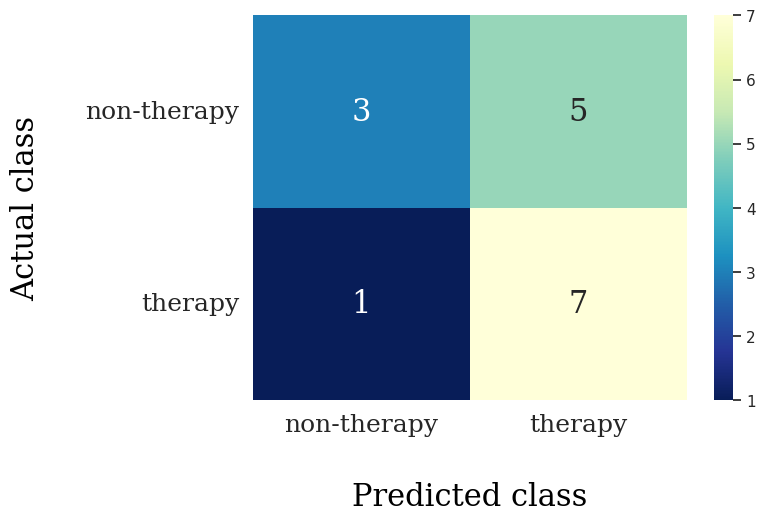

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

###Mean fv- Normalization

In [105]:
train = train_y_0.append(train_y_1)

X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]


X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm


n_estimators = [100, 200, 400, 500]
max_depth = [5, 10, 15, 20, 25, 30]
criterion = ['entropy', 'gini']
#min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'criterion' : criterion} #, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train_norm, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], criterion = bestF_['criterion']) #, min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train_norm, y_train)

print(bestF_)

<ipython-input-105-57de96a4054c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train_y_0.append(train_y_1)


Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 400}


In [106]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.843333,0.118369,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,0.876667,0.110604,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
2,0.880000,0.108730,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,0.880000,0.108730,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
4,0.843333,0.118369,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,0.840000,0.092856,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
6,0.880000,0.108730,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
7,0.880000,0.108730,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
8,0.843333,0.118369,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."
9,0.840000,0.092856,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."


In [107]:
y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16

[[0 8]
 [0 8]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

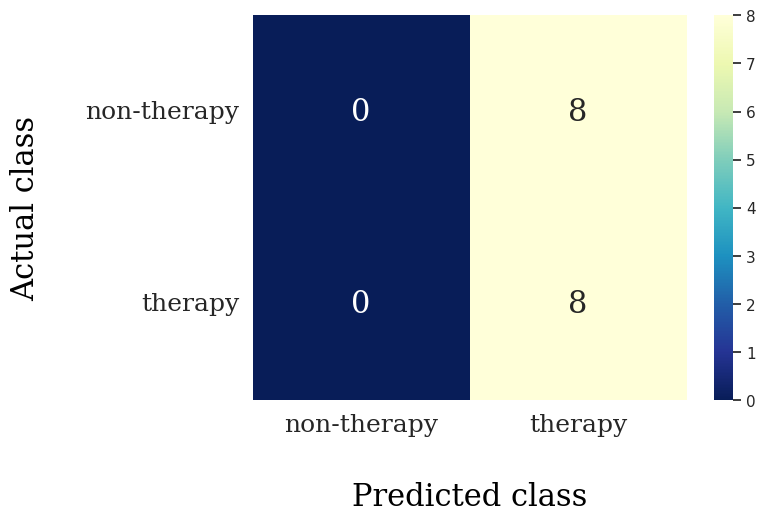

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

#4️⃣ ML // SVM Classifier

1.2.1) Kernel กำหนด ‘liner’, ‘rbf’ และ ‘poly’

1.2.2) Gamma กำหนด 0.001, 0.01, 0.1 และ 1

In [109]:
train = train_y_0.append(train_y_1)

X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

<ipython-input-109-97b5cb723747>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train_y_0.append(train_y_1)


###Mean fv SVM

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

#Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=10)

SVM = grid_search.fit(X_train, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'gamma': 0.001, 'kernel': 'linear'}
0.8066666666666666

 **print the array of mean scores only 

[0.80666667 0.87333333 0.80666667 0.80666667 0.87333333 0.80666667
 0.80666667 0.87333333 0.80666667 0.80666667 0.87333333 0.80666667]

 **examine the best model 

0.8733333333333333
{'gamma': 0.001, 'kernel': 'rbf'}
SVC(gamma=0.001)


In [111]:
import pandas as pd
results_df = pd.DataFrame(SVM.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
print(results_df)

    mean_test_score  std_test_score                                params
0          0.806667        0.138082  {'gamma': 0.001, 'kernel': 'linear'}
1          0.873333        0.112349     {'gamma': 0.001, 'kernel': 'rbf'}
2          0.806667        0.156915    {'gamma': 0.001, 'kernel': 'poly'}
3          0.806667        0.138082   {'gamma': 0.01, 'kernel': 'linear'}
4          0.873333        0.112349      {'gamma': 0.01, 'kernel': 'rbf'}
5          0.806667        0.156915     {'gamma': 0.01, 'kernel': 'poly'}
6          0.806667        0.138082    {'gamma': 0.1, 'kernel': 'linear'}
7          0.873333        0.112349       {'gamma': 0.1, 'kernel': 'rbf'}
8          0.806667        0.156915      {'gamma': 0.1, 'kernel': 'poly'}
9          0.806667        0.138082      {'gamma': 1, 'kernel': 'linear'}
10         0.873333        0.112349         {'gamma': 1, 'kernel': 'rbf'}
11         0.806667        0.156915        {'gamma': 1, 'kernel': 'poly'}


In [112]:

from sklearn import svm
svm= svm.SVC(random_state = 1, gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train, y_train)


y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16

[[0 8]
 [0 8]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

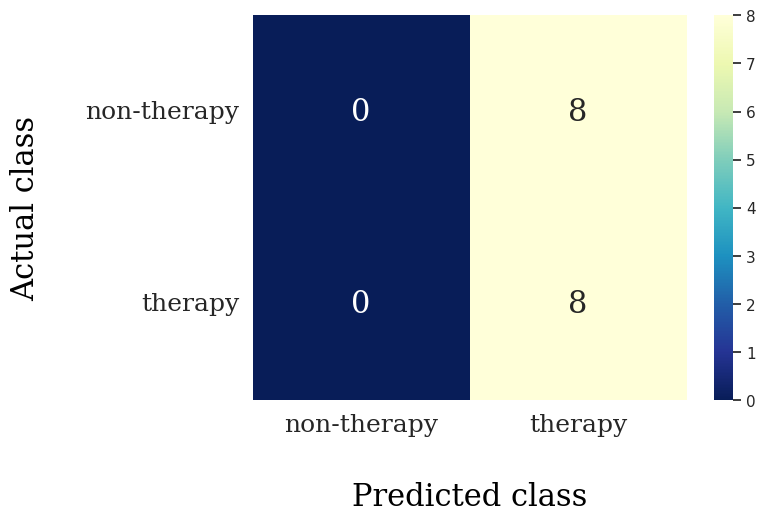

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

###Mean fv- Normalization SVM

In [114]:
X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

#Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=10)

SVM = grid_search.fit(X_train_norm, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'gamma': 0.001, 'kernel': 'linear'}
0.47666666666666674

 **print the array of mean scores only 

[0.47666667 0.46       0.47666667 0.47666667 0.46       0.46
 0.47666667 0.47666667 0.46       0.47666667 0.47666667 0.46      ]

 **examine the best model 

0.47666666666666674
{'gamma': 0.001, 'kernel': 'linear'}
SVC(gamma=0.001, kernel='linear')


In [116]:

from sklearn import svm
svm= svm.SVC(random_state = 1, gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train_norm, y_train)

y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       0.00      0.00      0.00         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16

[[8 0]
 [8 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

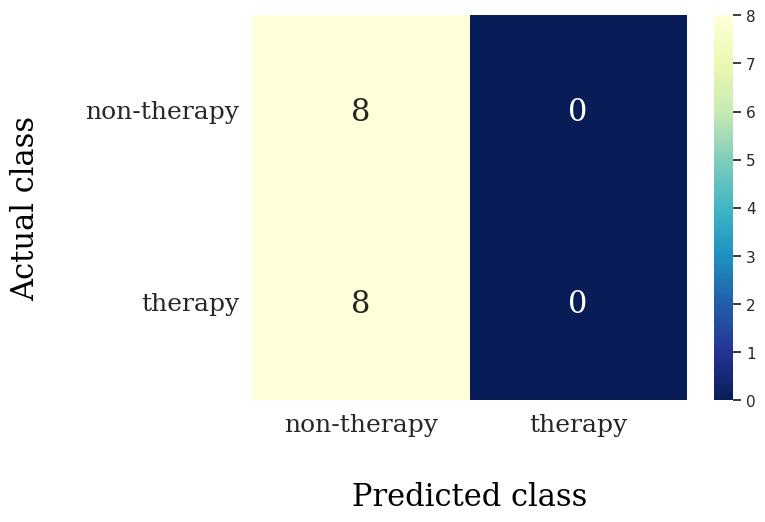

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

#5️⃣ ML //ANN Classifier

In [118]:

import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

###Mean fv ANN

1.3.1) solver กำหนด ‘lbfgs’, ‘sgd’ และ ‘adam’

1.3.2) alpha กำหนด 0.0001, 0.001, 0.01 และ 0.1

1.3.3) hidden_layer_sizes กำหนด 100, 300 และ 400

In [119]:
solver = ['lbfgs', 'sgd' , 'adam']
alpha = [1e-4, 1e-3, 1e-2, 1e-1]
hidden_layer_sizes = [100, 300, 400]

clf = MLPClassifier(random_state=1)
param_gridclf = {
    'solver': solver,
    'alpha': alpha,
    'hidden_layer_sizes': hidden_layer_sizes
}

grid_search = GridSearchCV(clf, param_gridclf, cv=10)

bestANN = grid_search.fit(X_train, y_train)
bestANN_ = bestANN.best_params_

ANNOpt = MLPClassifier(random_state=1, solver = bestANN_['solver'], alpha = bestANN_['alpha'], hidden_layer_sizes = bestANN_['hidden_layer_sizes'])
modelANNOpt = ANNOpt.fit(X_train, y_train)

print(bestANN_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of i

{'alpha': 0.0001, 'hidden_layer_sizes': 400, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [140]:
import pandas as pd
results_df_ANN = pd.DataFrame(bestANN.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
print(results_df_ANN)

    mean_test_score  std_test_score  \
0          0.560000        0.180000   
1          0.500000        0.063246   
2          0.500000        0.063246   
3          0.520000        0.107703   
4          0.536667        0.073711   
5          0.586667        0.155778   
6          0.743333        0.201687   
7          0.466667        0.091894   
8          0.643333        0.173237   
9          0.560000        0.180000   
10         0.500000        0.063246   
11         0.500000        0.063246   
12         0.560000        0.180000   
13         0.536667        0.073711   
14         0.553333        0.081921   
15         0.743333        0.201687   
16         0.466667        0.091894   
17         0.703333        0.158780   
18         0.540000        0.135647   
19         0.500000        0.063246   
20         0.500000        0.063246   
21         0.540000        0.135647   
22         0.536667        0.073711   
23         0.536667        0.073711   
24         0.726667      

In [121]:
y_predANN = ANNOpt.predict(X_test)

print(classification_report(y_test, y_predANN))
y_predANNRe = confusion_matrix(y_test, y_predANN)
print(y_predANNRe)

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.67      0.75      0.71         8

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.69      0.69      0.69        16

[[5 3]
 [2 6]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

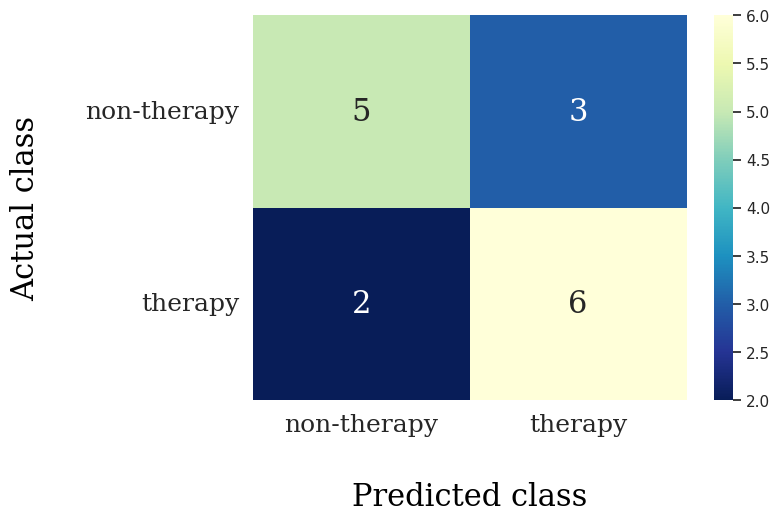

In [122]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(y_predANNRe, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

###Mean fv-Normalization ANN

In [123]:
solver = ['lbfgs', 'sgd' , 'adam']
alpha = [1e-4, 1e-3, 1e-2, 1e-1]
hidden_layer_sizes = [100, 300, 400]

clfNor = MLPClassifier(random_state=1)
param_gridclfNor = {
    'solver': solver,
    'alpha': alpha,
    'hidden_layer_sizes': hidden_layer_sizes
}

grid_searchNor = GridSearchCV(clfNor, param_gridclfNor, cv=10)

bestANNNor = grid_searchNor.fit(X_train_norm, y_train)
bestANNNor_ = bestANNNor.best_params_

ANNNorOpt = MLPClassifier(random_state=1, solver = bestANNNor_['solver'], alpha = bestANNNor_['alpha'], hidden_layer_sizes = bestANNNor_['hidden_layer_sizes'])
modelANNNorOpt = ANNNorOpt.fit(X_train_norm, y_train)

print(bestANNNor_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

{'alpha': 0.01, 'hidden_layer_sizes': 300, 'solver': 'lbfgs'}


In [141]:
import pandas as pd
results_df_ANNNor = pd.DataFrame(bestANNNor.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
print(results_df_ANNNor)

    mean_test_score  std_test_score  \
0          0.596667        0.228741   
1          0.500000        0.063246   
2          0.460000        0.048990   
3          0.636667        0.187053   
4          0.500000        0.063246   
5          0.493333        0.097525   
6          0.606667        0.151144   
7          0.500000        0.063246   
8          0.426667        0.064636   
9          0.643333        0.104403   
10         0.500000        0.063246   
11         0.460000        0.048990   
12         0.676667        0.209788   
13         0.500000        0.063246   
14         0.493333        0.097525   
15         0.616667        0.226201   
16         0.500000        0.063246   
17         0.443333        0.095510   
18         0.693333        0.195391   
19         0.500000        0.063246   
20         0.460000        0.048990   
21         0.713333        0.164114   
22         0.500000        0.063246   
23         0.460000        0.116237   
24         0.640000      

In [124]:
y_predANNNor = ANNNorOpt.predict(X_test)

print(classification_report(y_test, y_predANNNor))
y_predANNReNor = confusion_matrix(y_test, y_predANNNor)
print(y_predANNReNor)

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.71      0.62      0.67         8

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.69      0.69      0.69        16

[[6 2]
 [3 5]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

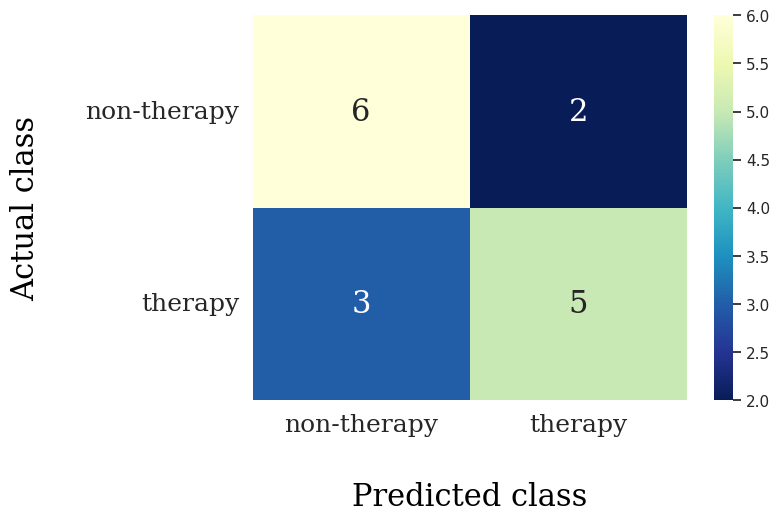

In [125]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(y_predANNReNor, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

#6️⃣ ML // KNN Classifier

1.1.1) n_neighbors กำหนด 3, 5, 7 และ 9

1.1.2) Weights กำหนด ‘uniform’และ ‘distance’

###Mean fv KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [132]:
X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [133]:
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']  # Corrected parameter name

knn = KNeighborsClassifier()
param_gridknn = {
    'n_neighbors': n_neighbors,
    'weights': weights  # Corrected parameter name
}

grid_search_knn = GridSearchCV(knn, param_gridknn, cv=10)

bestknn = grid_search_knn.fit(X_train, y_train)
bestknn_ = bestknn.best_params_

knnOpt = KNeighborsClassifier(n_neighbors=bestknn_['n_neighbors'], weights=bestknn_['weights'])  # Corrected parameter name
modelknnOpt = knnOpt.fit(X_train, y_train)

print(bestknn_)

{'n_neighbors': 3, 'weights': 'distance'}


In [143]:
import pandas as pd
results_df_knn = pd.DataFrame(bestknn.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
print(results_df_knn)

   mean_test_score  std_test_score                                     params
0         0.683333        0.165496   {'n_neighbors': 3, 'weights': 'uniform'}
1         0.700000        0.134990  {'n_neighbors': 3, 'weights': 'distance'}
2         0.556667        0.168028   {'n_neighbors': 5, 'weights': 'uniform'}
3         0.683333        0.165496  {'n_neighbors': 5, 'weights': 'distance'}
4         0.593333        0.149666   {'n_neighbors': 7, 'weights': 'uniform'}
5         0.700000        0.134990  {'n_neighbors': 7, 'weights': 'distance'}
6         0.626667        0.134825   {'n_neighbors': 9, 'weights': 'uniform'}
7         0.700000        0.134990  {'n_neighbors': 9, 'weights': 'distance'}


In [134]:
y_predknn = modelknnOpt.predict(X_test)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_predknn))

cmknn = (confusion_matrix(y_test, y_predknn))#performance
print(cmknn)

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.83      0.62      0.71         8

    accuracy                           0.75        16
   macro avg       0.77      0.75      0.75        16
weighted avg       0.77      0.75      0.75        16

[[7 1]
 [3 5]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

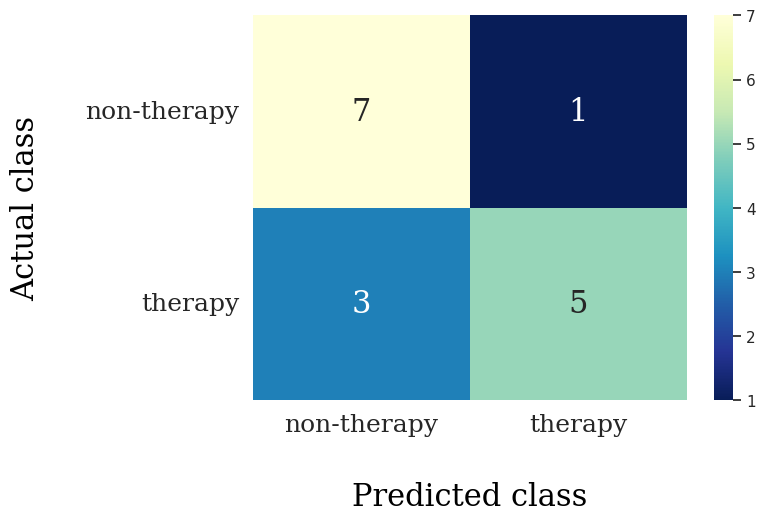

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cmknn, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

###Mean fv-Normalization kNN

In [136]:
X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [137]:
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']  # Corrected parameter name

knnNor = KNeighborsClassifier()
param_gridknnNor = {
    'n_neighbors': n_neighbors,
    'weights': weights  # Corrected parameter name
}

grid_search_knnNor = GridSearchCV(knnNor, param_gridknnNor, cv=10)

bestknnNor = grid_search_knnNor.fit(X_train_norm, y_train)
bestknnNor_ = bestknnNor.best_params_

knnNorOpt = KNeighborsClassifier(n_neighbors=bestknnNor_['n_neighbors'], weights=bestknnNor_['weights'])  # Corrected parameter name
modelknnNorOpt = knnOpt.fit(X_train_norm, y_train)

print(bestknn_)

{'n_neighbors': 3, 'weights': 'distance'}


In [144]:
import pandas as pd
results_df_knnNor = pd.DataFrame(bestknnNor.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
print(results_df_knnNor)

   mean_test_score  std_test_score                                     params
0         0.683333        0.165496   {'n_neighbors': 3, 'weights': 'uniform'}
1         0.700000        0.134990  {'n_neighbors': 3, 'weights': 'distance'}
2         0.556667        0.168028   {'n_neighbors': 5, 'weights': 'uniform'}
3         0.683333        0.165496  {'n_neighbors': 5, 'weights': 'distance'}
4         0.593333        0.149666   {'n_neighbors': 7, 'weights': 'uniform'}
5         0.700000        0.134990  {'n_neighbors': 7, 'weights': 'distance'}
6         0.626667        0.134825   {'n_neighbors': 9, 'weights': 'uniform'}
7         0.700000        0.134990  {'n_neighbors': 9, 'weights': 'distance'}


In [138]:
y_predknnNor = modelknnNorOpt.predict(X_test)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_predknnNor))

cmknnNor = (confusion_matrix(y_test, y_predknnNor))#performance
print(cmknnNor)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       0.00      0.00      0.00         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16

[[8 0]
 [8 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

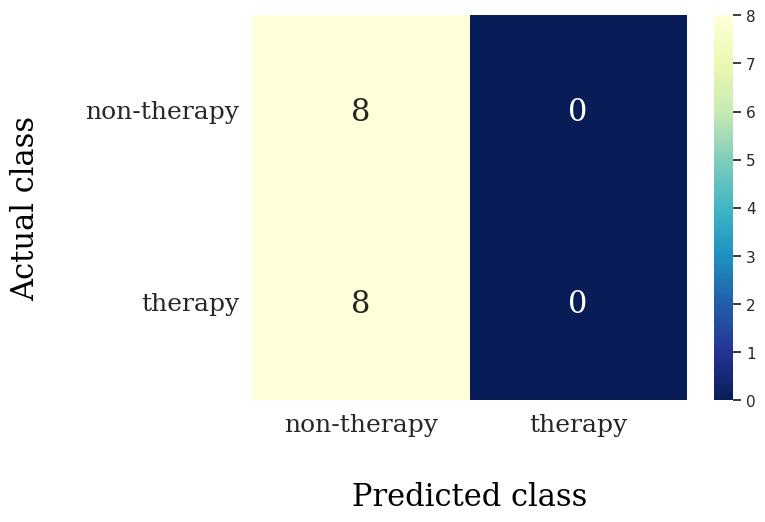

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}



sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cmknnNor, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) # Blues, Oranges, Reds, YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)